In [26]:
library(arrow)
library(RNOmni)

In [52]:
df <- read_feather('../results/feather/Hinf_norm_mic.feather')

df$AMP_MIC <- as.numeric(df$AMP_MIC)
# df <- df[df$AMP_MIC < 200,]
df$AMP_MIC.rankscaled <- RankNorm(df$AMP_MIC)
df <- subset(df, select = -c(FullID, Perc.ReadsMapped, CoverageMappedReads,
                             origin, AMP, serotype, beta_lactamase, samples))

In [53]:
model <- lm(AMP_MIC.rankscaled ~ ID_1688990_A, df)
summary(model)


Call:
lm(formula = AMP_MIC.rankscaled ~ ID_1688990_A, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3173 -0.6467 -0.1249  0.4884  2.4163 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.31108    0.06282  -4.952 1.32e-06 ***
ID_1688990_A  1.03364    0.11513   8.978  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8521 on 260 degrees of freedom
Multiple R-squared:  0.2367,	Adjusted R-squared:  0.2337 
F-statistic: 80.61 on 1 and 260 DF,  p-value: < 2.2e-16


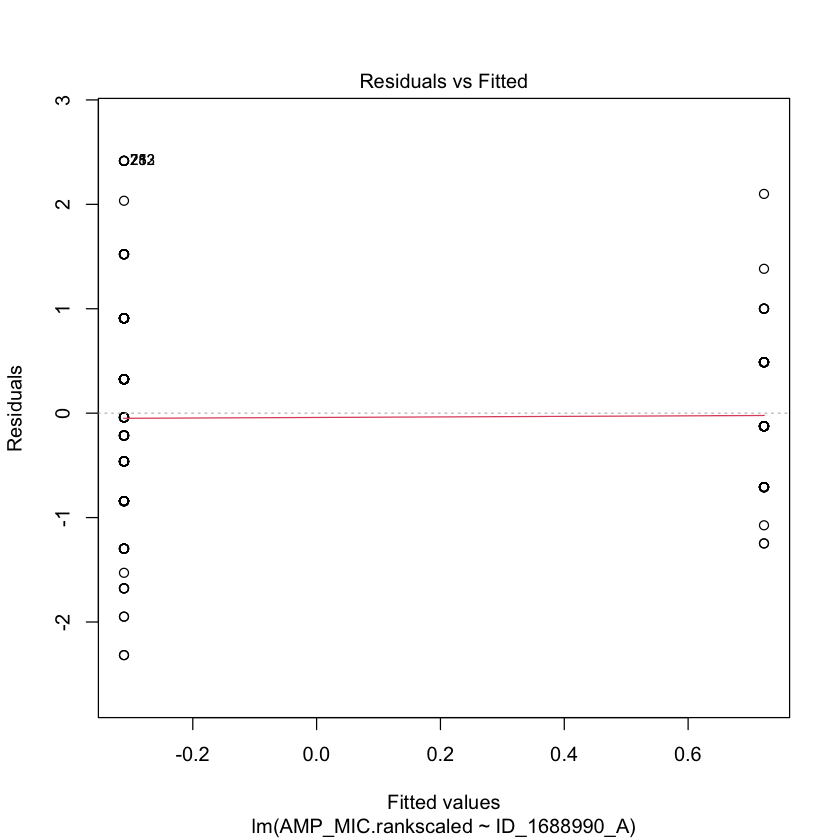

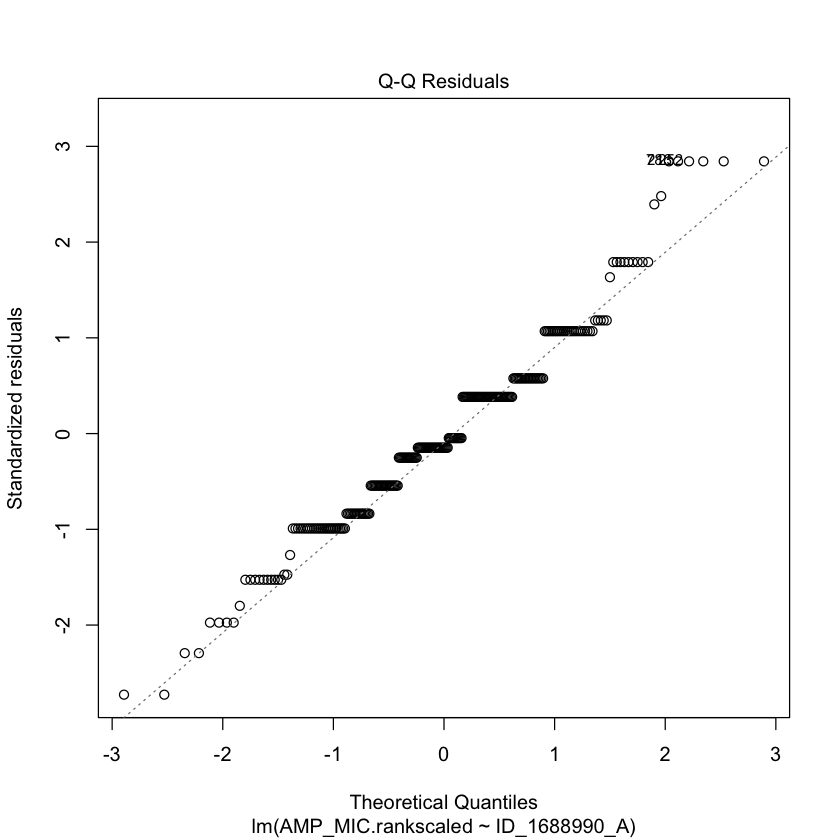

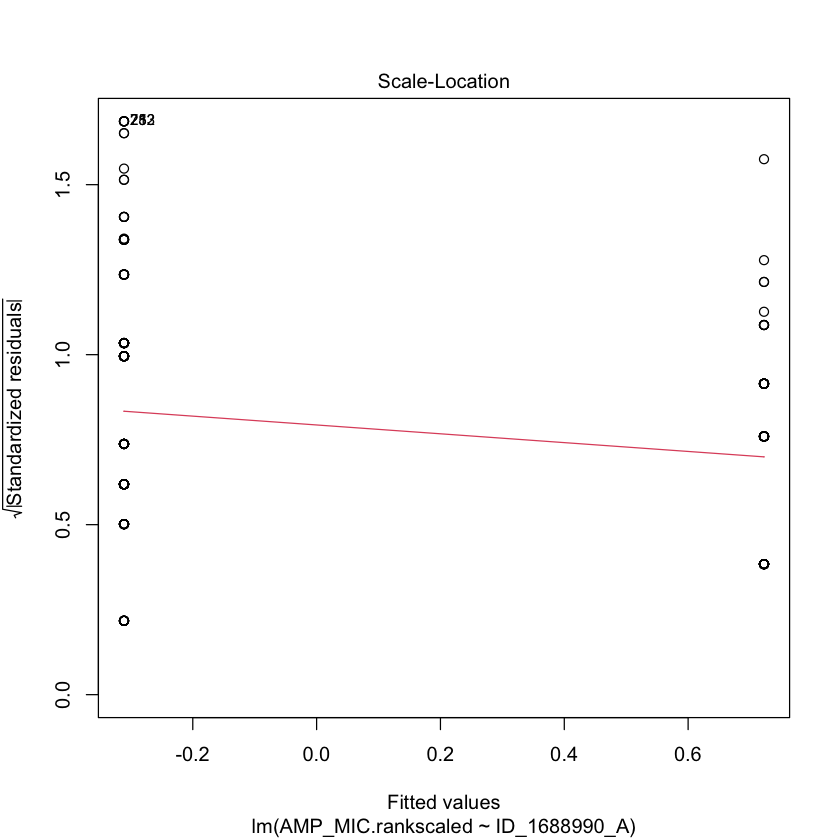

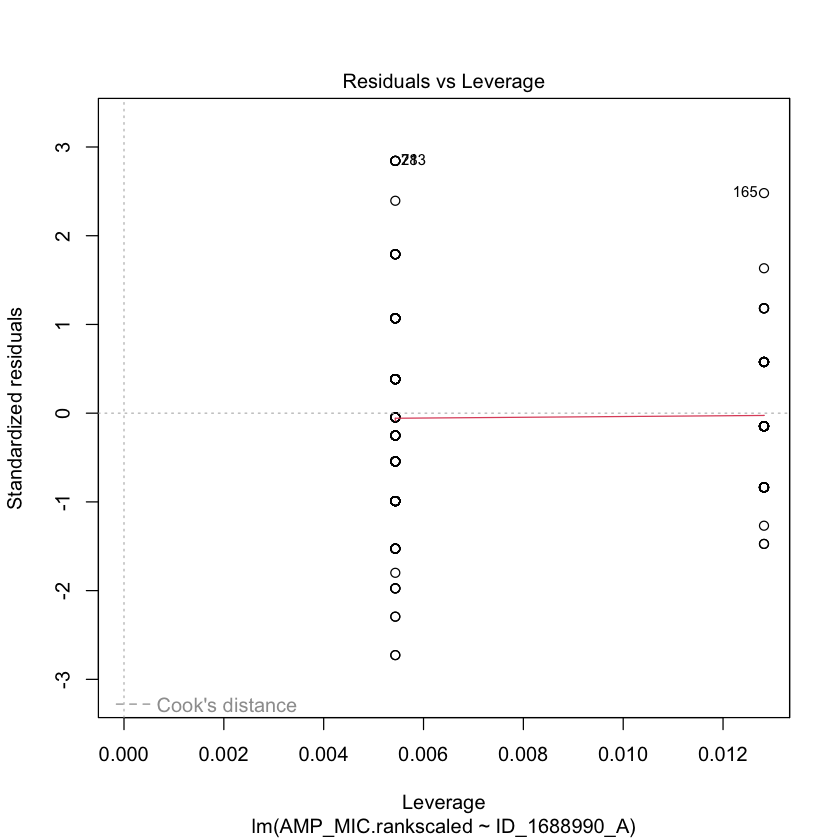

In [54]:
plot(model)

In [19]:
coef(summary(model))[2, "Pr(>|t|)"]

[1] 1.10246e-12